In [ ]:
#default_exp show_data

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
#export
from fastai.vision.all import *
from fastai.metrics import *
from fastai_amalgam.utils import *

In [ ]:
#hide
from nbdev.showdoc import show_doc

In [ ]:
#hide
from cinemanet.train.data_handler import *
from fastai_amalgam.augment.kornia import *
warnings.simplefilter('ignore')

batch_tfms = [ColorJitter(), RandomGrayscale(), HFlip(), VFlip()]
dhandler = (
    DataHandler("../../CinemaNet-Training/exports/datasets/shot-framing.json",
                is_multilabel=False, verbose=False)
    .get_dataset_df('train-clean', 'valid-clean')
    .filter_dataset()
    .setup_dls(batch_tfms=batch_tfms)
)
dls = dhandler.dls

In [ ]:
#export
@patch
def set_font_path(self:TfmdDL, font_path=None):
    self.font_path = font_path

In [ ]:
#export
@delegates(to=PILImage.draw_labels)
def draw_label(x, **kwargs):
    return PILImage.create(x[0]).draw_labels(x[1], **kwargs)

In [ ]:
#export
@patch
@delegates(to=draw_label, but=["font_color", "location", "draw_rect", "fsize_div_factor", "font_path", "font_size"])
def show_batch_grid(self:TfmdDL, b=None, n=20, ncol=4, show=True, unique=False,
                    unique_each=True, font_path=None, font_size=20, **kwargs):
    """Show a batch of images
    Key Params:
      * n:      No. of images to display
      * n_col:  No. of columns in the grid
      * unique: Display the same image with different augmentations
      * unique_each: If True, displays a different img on each call
      * font_path:   Path to the `.ttf` font file. Required to display labels
      * font_size:   Size of the font
    """
    if font_path is not None: self.set_font_path(font_path)
    if not hasattr(self, 'font_path'):
        self.font_path = font_path
    if unique:
        old_get_idxs = self.get_idxs
        if unique_each:
            i = np.random.choice(self.n)
            self.get_idxs = partial(itertools.repeat, i)
        else:
            self.get_idxs = lambda: Inf.zeros
    if b is None: b = self.one_batch()
    if not show: return self._pre_show_batch(b, max_n=n)
    _,__, b = self._pre_show_batch(b, max_n=n)
    if unique: self.get_idxs = old_get_idxs
    return make_img_grid([draw_label(i, font_path=self.font_path, font_size=font_size) for i in b],
                         ncol=ncol, img_size=None)

In [ ]:
show_doc(TfmdDL.show_batch_grid)

<h4 id="TfmdDL.show_batch_grid" class="doc_header"><code>TfmdDL.show_batch_grid</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>TfmdDL.show_batch_grid</code>(**`b`**=*`None`*, **`n`**=*`20`*, **`ncol`**=*`4`*, **`show`**=*`True`*, **`unique`**=*`False`*, **`unique_each`**=*`True`*, **`font_path`**=*`None`*, **`font_size`**=*`20`*)

```
Show a batch of images
Key Params:
  * n:      No. of images to display
  * n_col:  No. of columns in the grid
  * unique: Display the same image with different augmentations
  * unique_each: If True, displays a different img on each call
  * font_path:   Path to the `.ttf` font file. Required to display labels
  * font_size:   Size of the font
```

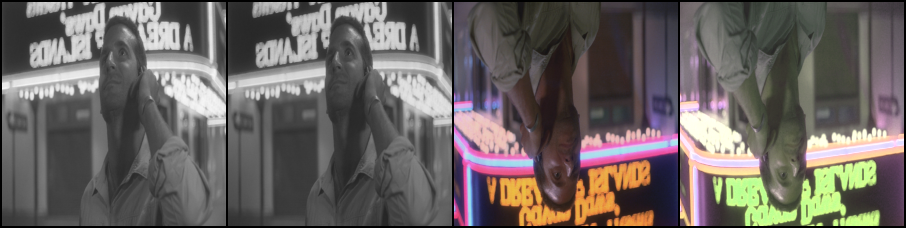

In [ ]:
dls.show_batch_grid(n=4, unique=True)

In [ ]:
dls.set_font_path("../fonts/DIN Alternate Bold.ttf")

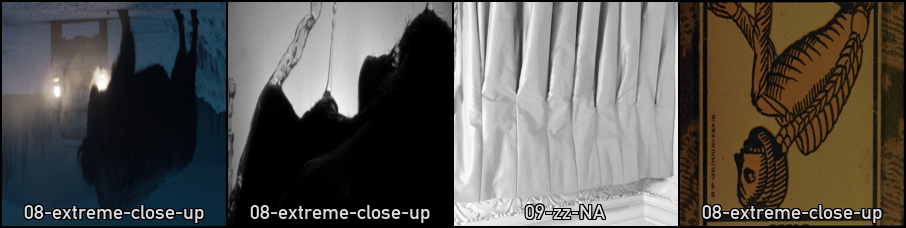

In [ ]:
dls.show_batch_grid(n=4, unique=False)

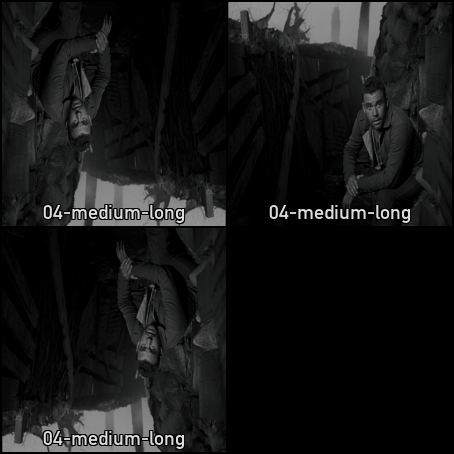

In [ ]:
dls.show_batch_grid(n=3, ncol=2, unique=True)

### Export

In [ ]:
from nbdev.export import *
notebook2script('show_data.ipynb')

Converted show_data.ipynb.
